In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
plt.style.use("plot_style.mplstyle")

from lmphoton.simulation import current_simulation as sim

from tqdm import tqdm

from scipy.optimize import minimize
from functools import partial

from xps_phase_shifter import XPS_PhaseShifter
from hps_phase_shifter import HPS_PhaseShifter

xps = XPS_PhaseShifter()
hps = HPS_PhaseShifter()
um=1e-6

100%|██████████| 1001/1001 [00:00<00:00, 99140.44it/s]


Text(0.5, 1.0, 'XPS Phase Shifter')

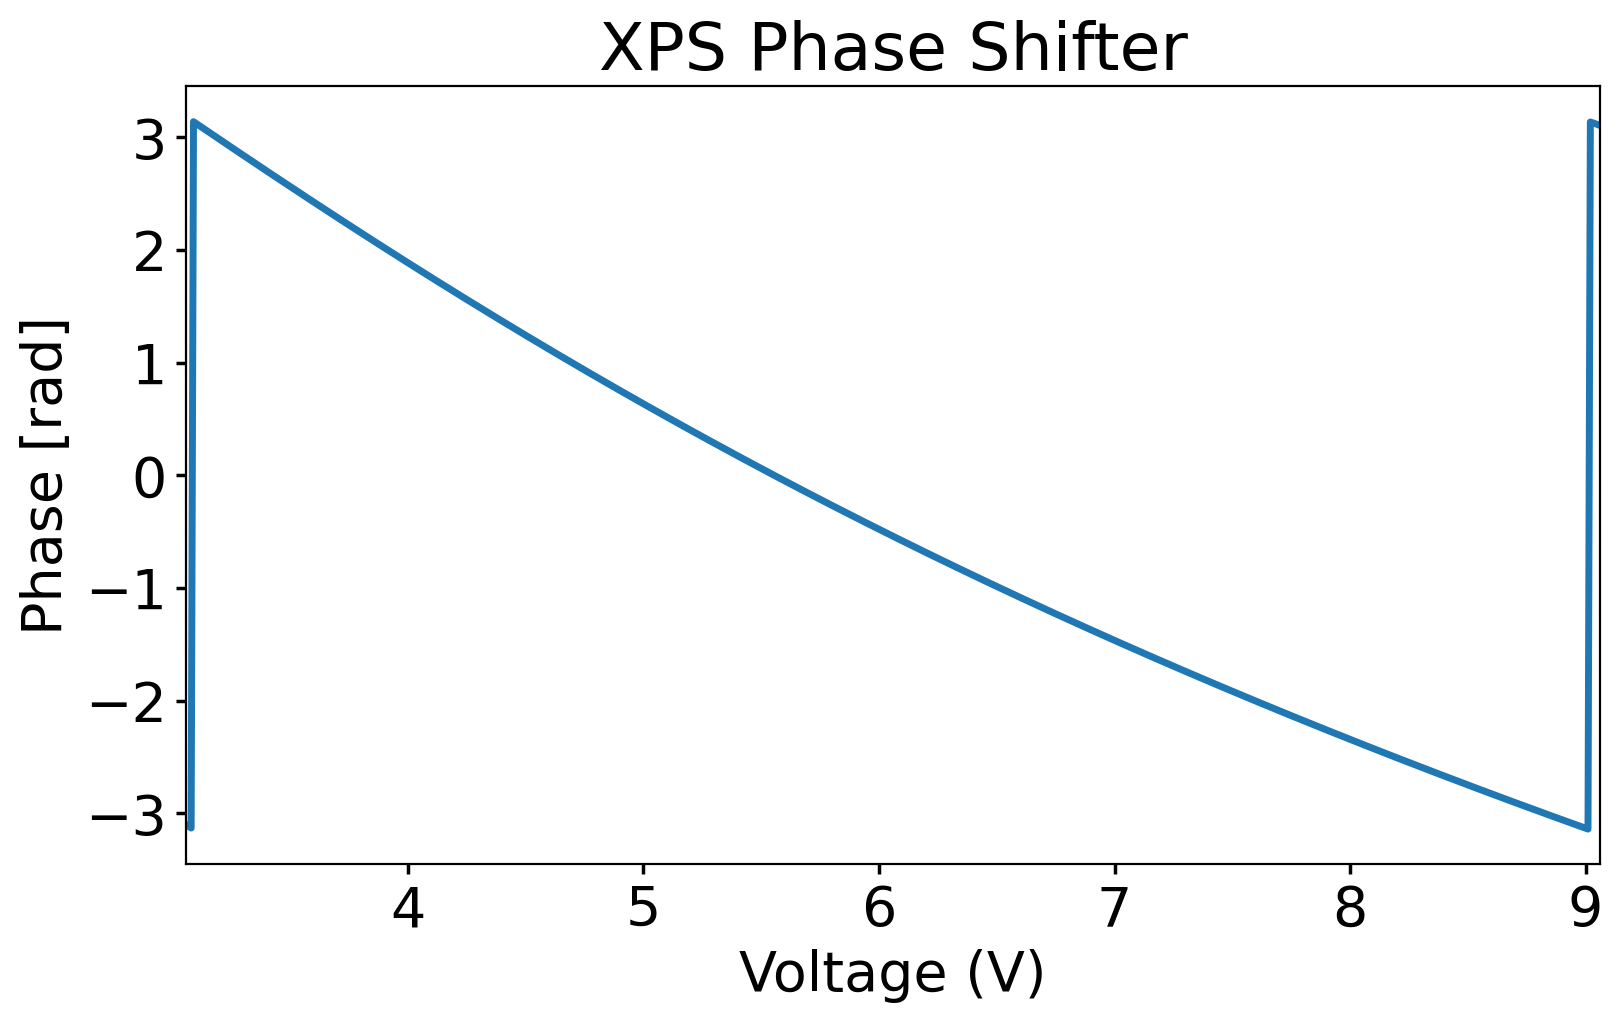

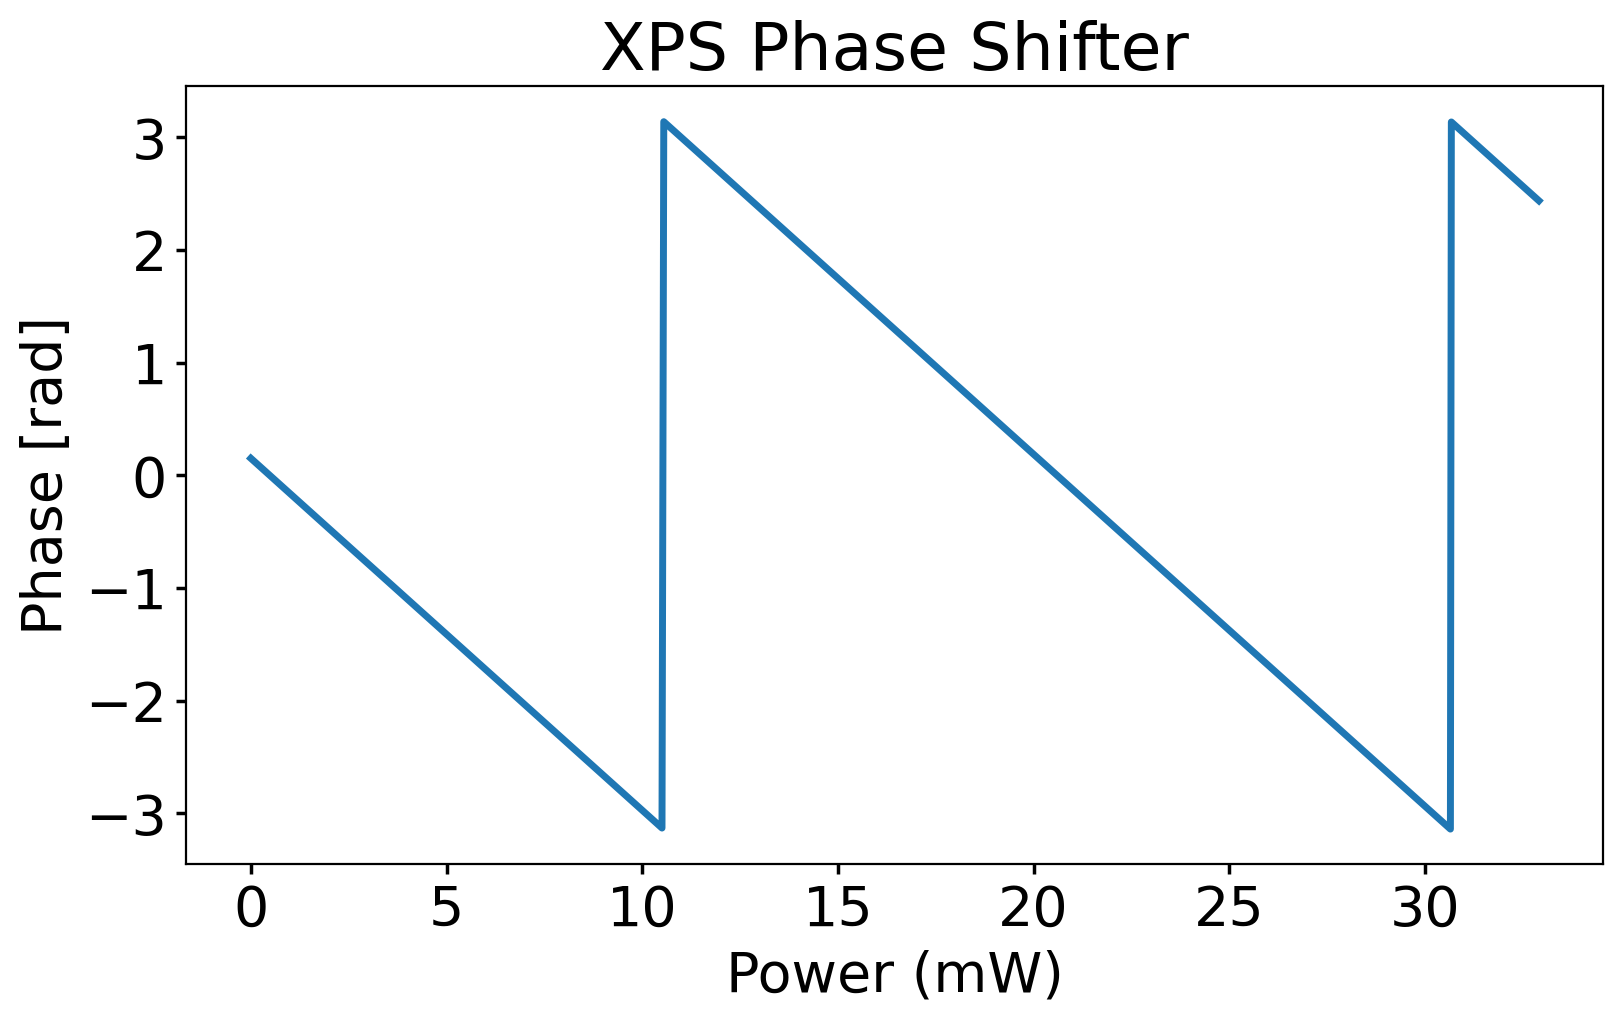

In [8]:
voltages = np.linspace(0, 10, 1001)

xps_phase = []
xps_power = []
input = np.array([1.0, 0.0])
for volt in tqdm(voltages):
  xps.heater_voltage = volt
  xps_power.append(xps.heater_power)
  xps.recursive_update()
  s_matrix = np.angle(np.matmul(xps.smatrix, input))
  xps_phase.append(s_matrix[1])

plt.figure()
plt.plot(voltages, xps_phase)
plt.grid()
plt.xlabel("Voltage (V)")
plt.xlim([3.06,9.06])
plt.ylabel("Phase [rad]")
plt.title("XPS Phase Shifter")

plt.figure()
plt.plot(np.array(xps_power)*1e3, xps_phase)
plt.grid()
plt.xlabel("Power (mW)")
plt.ylabel("Phase [rad]")
plt.title("XPS Phase Shifter")

100%|██████████| 1001/1001 [00:00<00:00, 72020.35it/s]


Text(0.5, 1.0, 'HPS Phase Shifter')

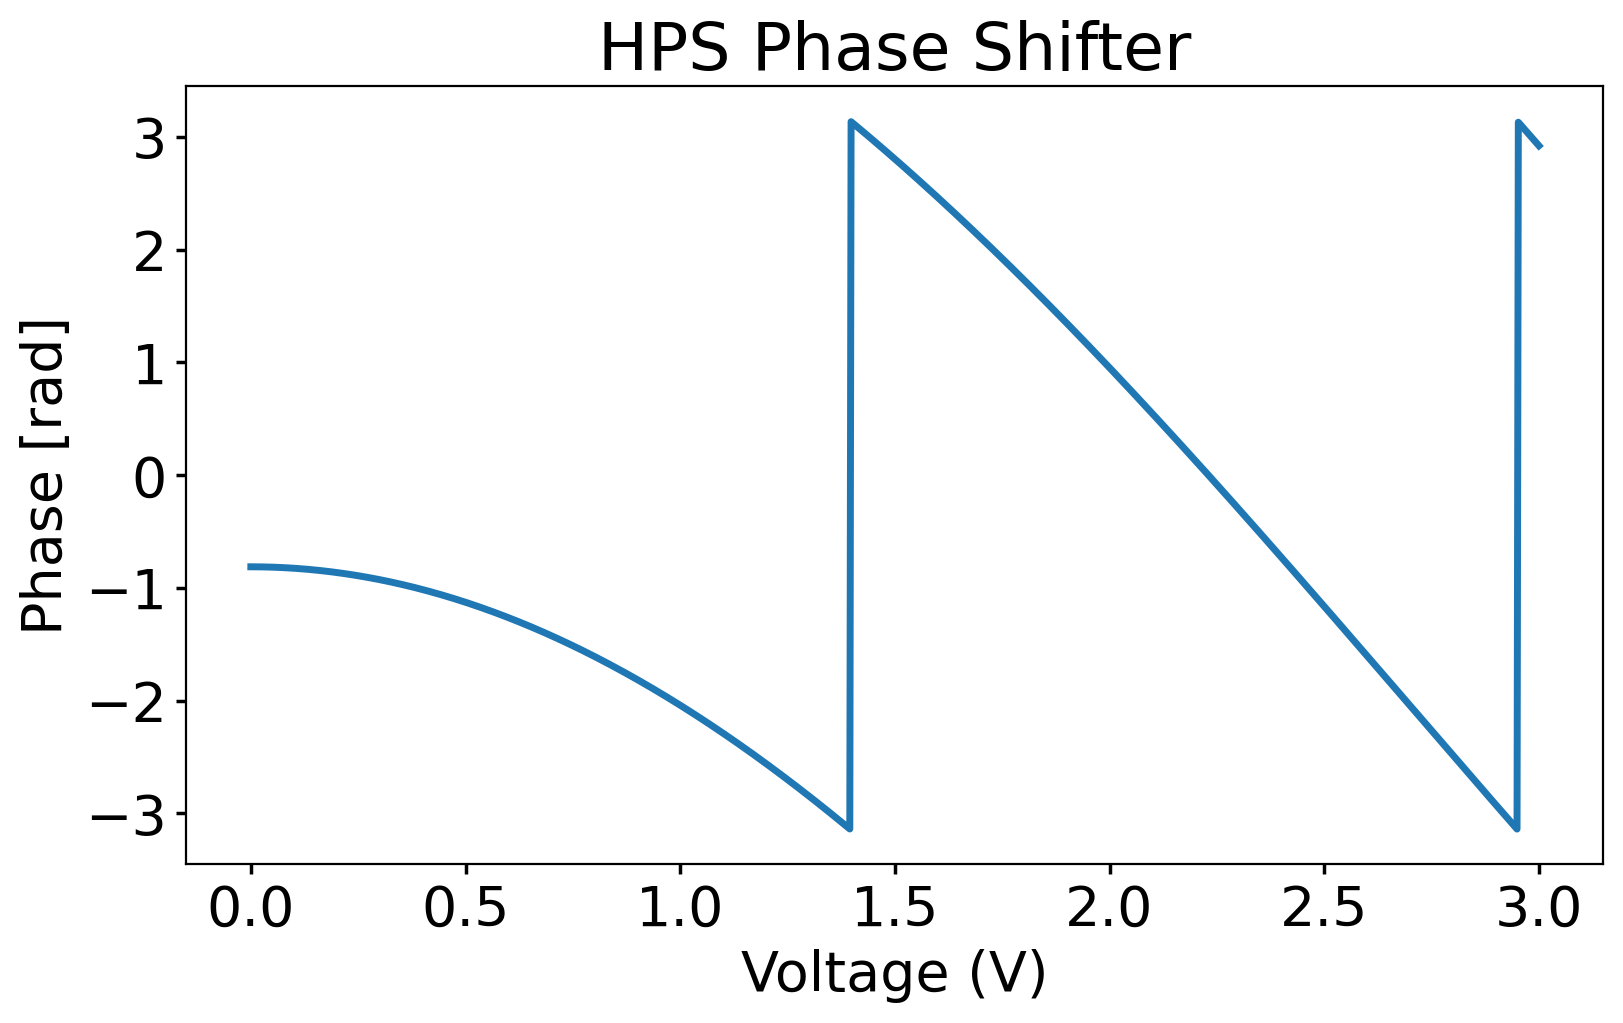

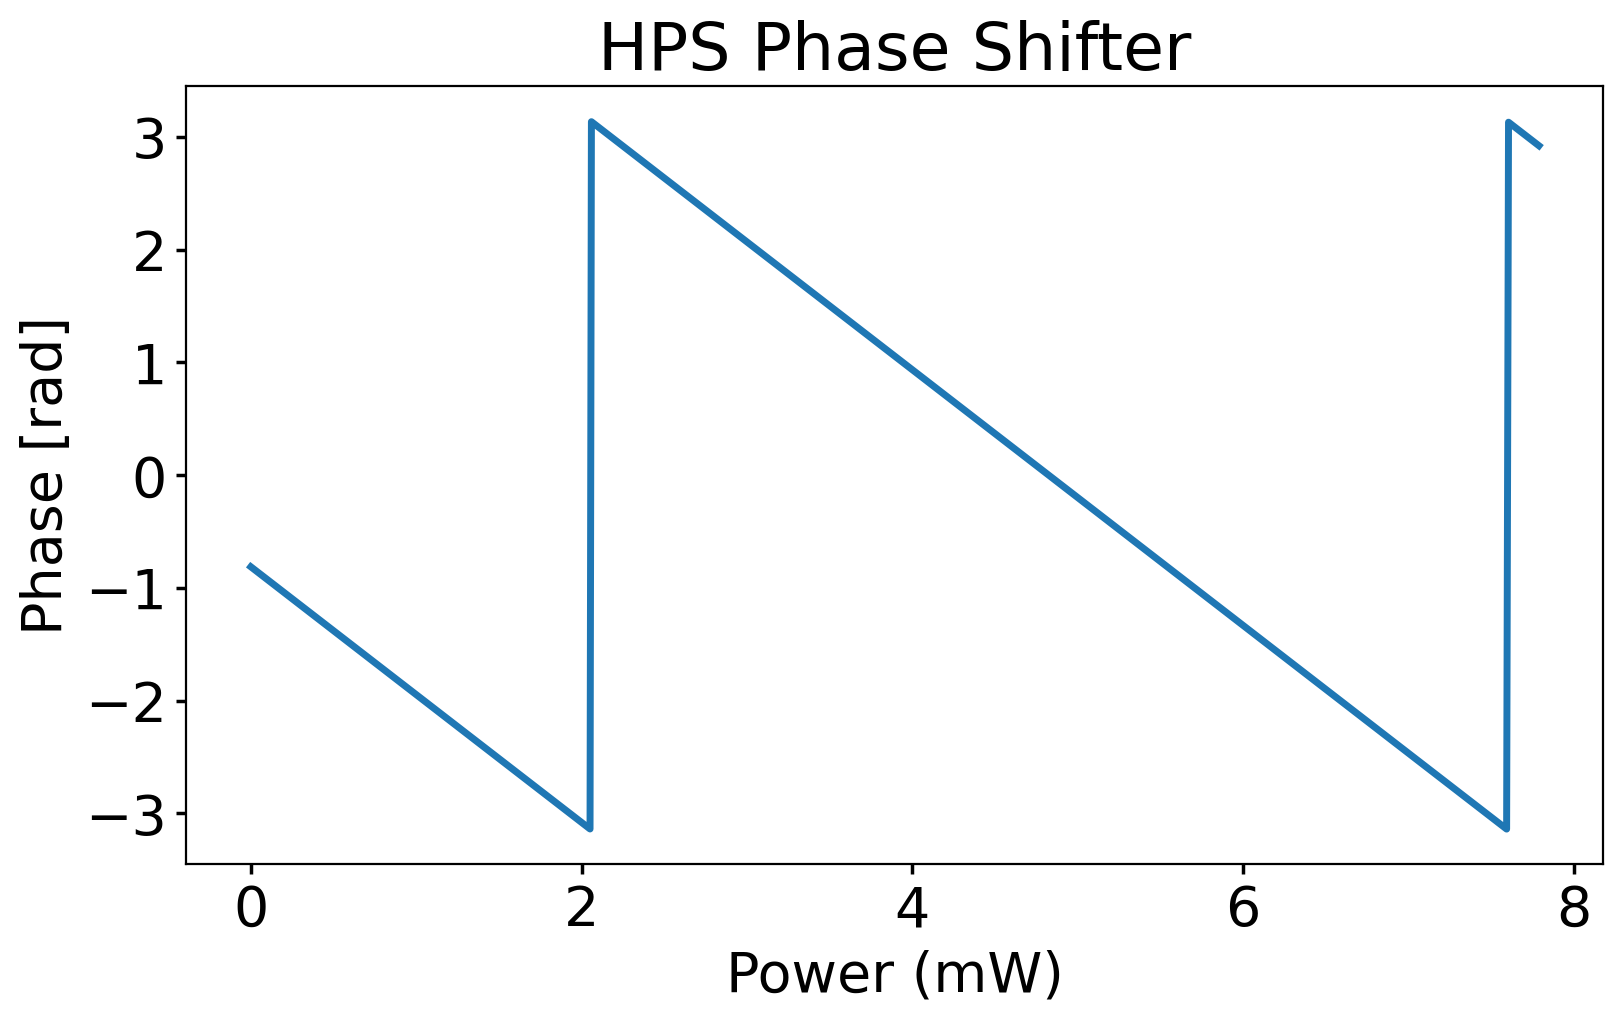

In [3]:
voltages = np.linspace(0, 3, 1001)

hps_phase = []
hps_power = []
input = np.array([1.0, 0.0])
for volt in tqdm(voltages):
  hps.heater_voltage = volt
  hps_power.append(hps.heater_power)
  hps.recursive_update()
  s_matrix = np.angle(np.matmul(hps.smatrix, input))
  hps_phase.append(s_matrix[1])

plt.figure()
plt.plot(voltages, hps_phase)
plt.grid()
plt.xlabel("Voltage (V)")
plt.ylabel("Phase [rad]")
plt.title("HPS Phase Shifter")

plt.figure()
plt.plot(np.array(hps_power)*1e3, hps_phase)
plt.grid()
plt.xlabel("Power (mW)")
plt.ylabel("Phase [rad]")
plt.title("HPS Phase Shifter")